<a href="https://colab.research.google.com/github/MichelTCHATCHOUA/supermarket-sales-analysis/blob/main/supermarketAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Cellule 1 – Import des bibliothèques

# Librairies pour la manipulation des données et les graphiques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optionnel : pour que les graphiques s'affichent dans le notebook
%matplotlib inline

In [5]:
# Cellule 2 – Charger les données depuis GitHub

# URL brute du fichier CSV sur GitHub
url = "https://raw.githubusercontent.com/MichelTCHATCHOUA/supermarket-sales-analysis/main/data/SuperMarket%20Analysis.csv"

# Charger les données dans un DataFrame pandas
df = pd.read_csv(url, encoding='utf-8')  # Remplacer par 'ISO-8859-1' si problème d'encodage

# Aperçu des 5 premières lignes
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# Cellule 3 – Informations générales sur le dataset

# Dimensions du dataset
print("Dimensions du dataset :", df.shape)

# Colonnes disponibles
print("\nColonnes :", df.columns.tolist())

# Types de données
print("\nTypes de données :")
print(df.dtypes)

# Infos globales
print("\nInfos :")
df.info()

# Statistiques descriptives
print("\nStatistiques descriptives :")
df.describe()


Dimensions du dataset : (1000, 17)

Colonnes : ['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Sales', 'Date', 'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income', 'Rating']

Types de données :
Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Sales                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

Infos :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):


,Unit price,Quantity,Tax 5%,Sales,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


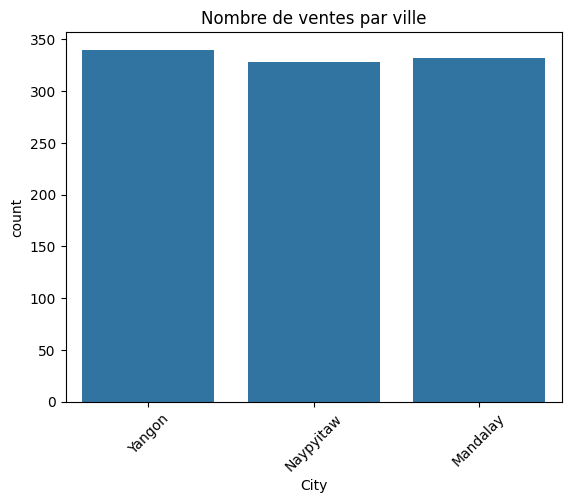

In [6]:
# Cellule 4 – Visualisation des ventes par ville

sns.countplot(data=df, x="City")
plt.title("Nombre de ventes par ville")
plt.xticks(rotation=45)
plt.savefig("images/sales_by_city.png", dpi=200, bbox_inches='tight')
plt.show()

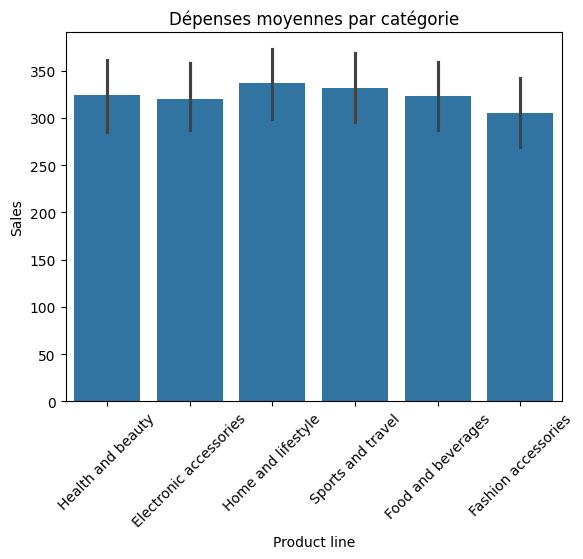

In [7]:
# Cellule 5 – Dépenses moyennes par catégorie de produit

sns.barplot(data=df, x="Product line", y="Sales", estimator='mean')
plt.title("Dépenses moyennes par catégorie")
plt.xticks(rotation=45)
plt.savefig("images/sales_by_category.png", dpi=200, bbox_inches='tight')
plt.show()

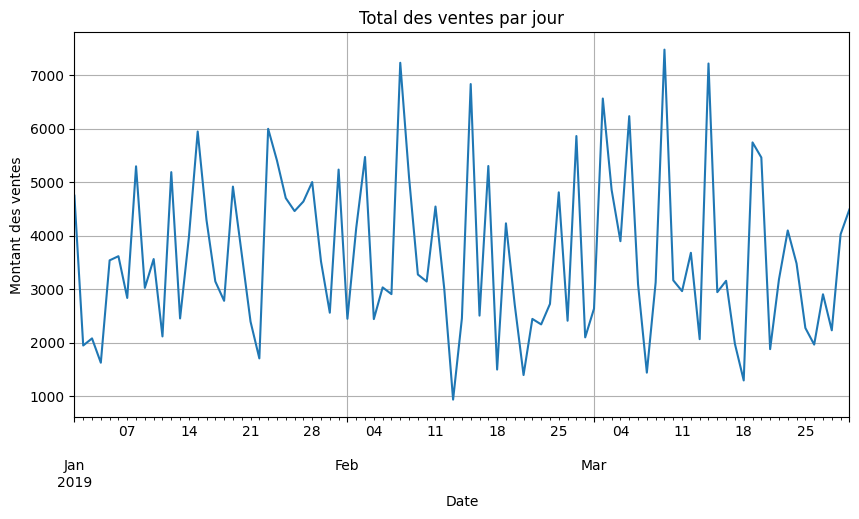

In [9]:
# Cellule 6 – Analyse temporelle des ventes

# Convertir la colonne 'Date' en datetime
df['Date'] = pd.to_datetime(df['Date'])

# Agréger les ventes par jour
daily_sales = df.groupby('Date')['Sales'].sum()

# Tracer l'évolution des ventes
daily_sales.plot(figsize=(10,5))
plt.title("Total des ventes par jour")
plt.ylabel("Montant des ventes")
plt.xlabel("Date")
plt.grid()
plt.savefig("images/sales_by_day.png", dpi=200, bbox_inches='tight')
plt.show()

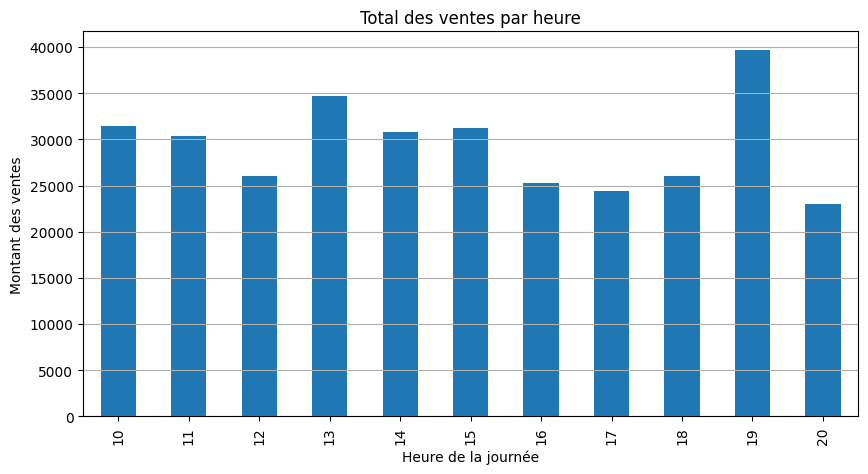

In [8]:
# Cellule 7 – Analyse des ventes par heure

# Convertir la colonne 'Time' en heure (0-23)
df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour

# Total des ventes par heure
sales_by_hour = df.groupby('Hour')['Sales'].sum()

# Affichage
sales_by_hour.plot(kind='bar', figsize=(10,5))
plt.title("Total des ventes par heure")
plt.xlabel("Heure de la journée")
plt.ylabel("Montant des ventes")
plt.grid(axis="y")
plt.savefig("images/sales_by_hour.png", dpi=200, bbox_inches='tight')
plt.show()

/tmp/ipython-input-1217881896.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Customer type', y='Sales', estimator='sum', ci=None)


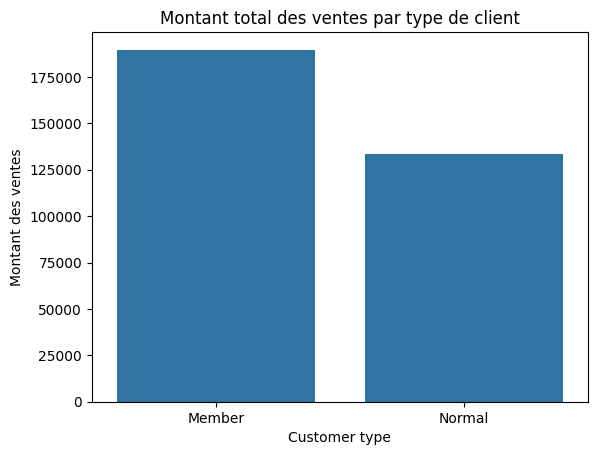

In [22]:
# Cellule 8 – Analyse des ventes par type de client

# Total des ventes par type de client
sns.barplot(data=df, x='Customer type', y='Sales', estimator='sum', ci=None)
plt.title("Montant total des ventes par type de client")
plt.ylabel("Montant des ventes")
plt.show()

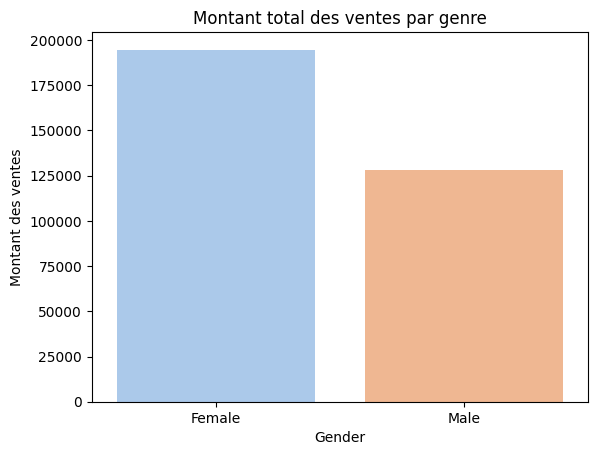

In [ ]:
# Cellule 9 – Analyse des ventes par genre

# Total des ventes par genre
sns.barplot(data=df, x='Gender', y='Sales', estimator='sum', errorbar=None, hue='Gender', palette='pastel', legend=False)
plt.title("Montant total des ventes par genre")
plt.ylabel("Montant des ventes")
plt.show()

In [1]:
# 1. Créer le dossier images s'il n'existe pas
import os
os.makedirs('images', exist_ok=True)

In [10]:
# Zip et téléchargement
!zip -r images.zip images
from google.colab import files
files.download('images.zip')

  adding: images/ (stored 0%)
  adding: images/sales_by_day.png (deflated 5%)
  adding: images/sales_by_city.png (deflated 21%)
  adding: images/sales_by_category.png (deflated 16%)
  adding: images/sales_by_hour.png (deflated 26%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
!echo "pandas\nnumpy\nmatplotlib\nseaborn" > requirements.txt